<h2>Understanding <i>pandas</i>: A Case Study Approach</h2>

Like NumPy, <b><i>pandas</i></b> is a Python package that is part of a larger "open-source software system for mathematics, science, and engineering" called SciPy. While NumPy provides a laundry list of classes, methods and functions for dealing with arrays, it offers modest support for further data analysis and modeling.  This is where pandas comes in. It enables Python developers to address the entire data analysis workflow without have to rely on a more domain specific programming environment like R.

The pandas package makes working with relational or labeled tabular data relatively simple and straightforward. As the documentation for the package notes, it is well suited for many kinds of data including tabular data with differing data types (similar to an Excel spreadsheet), time series data, arrays and matrices with row and column labels, and many other forms of observational or statistical data sets with and without labels.

Most of pandas' capabilities are surfaced in either one dimensional arrays called <b><i>Series</i></b> or two dimensional arrays called <b><i>DataFrames</i></b>. This note will concentrate on the latter - the basic structure, methods, functions, and techniques for analyzing and visualizing the data in dataframes. Like NumPy arrays, the methods and functions associated with these structures are very extensive, far too numerous to cover in this notebook. For compete coverage, see:

<ul>
<li>Series: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html#pandas.Series </li>
<li>Dataframes: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html </li>
<li>Tutorial covering both types of data structures: https://pandas.pydata.org/pandas-docs/stable/tutorials.html# </li>
<li>Tutorial from TutorialPoints covering basic data structures and associated methods and functions: https://www.tutorialspoint.com/python_pandas/index.htm </li>
</ul>

<h3><a class="anchor" id="toc">Table of Contents</a></h3>

1. [Case Study: Billboard Top Singles](#Dataset)<br>
2. [Loading a Dataframe and Inspecting the Data](#Loading)<br>
   [Reading Text and Excel Files](#Reading)<br>
   [Describing the Structure of a Dataframe](#Describe)<br>
   [Summary of Initial Structural Analysis](#Summary)<br>
3. [Indexing and Selecting Particular Rows and Columns](#Indexing_and_Selecting)<br>
   [Indexing](#Indexing)<br>
   [Labels as Indexes](#Labels)<br>
   [Groupby Method: Brief Example](#Groupby1)<br>
   [Selecting Subsets of Data](#Subsets)<br>
   [   Using Column Names](#Colnames)<br>
   [   Using loc](#loc)<br>
   [   Using iloc](#iloc)<br>
4. [Frequency Distributions and Other Statistics](#Frequency)<br>
   [Value_Counts Method](#Value_Counts)<br>
   [Groupby Method: Computational Details](#Groupby0)<br>
   [Adding New Columns](#Adding)<br>
   [Unstacking Multi-Column Arrays](#Unstack)<br>
5. [Pandas Plots](#Plots)<br>
   [Bar Plots](#Bars)<br>
   [Subplots](#Subplots)<br>
   [Line Plots](#Lines)<br>
6. [Final Comments](#Final)<br>




In [89]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [90]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

<a class="anchor" id="dataset"></a>
<h3>Case Study: Billboard Top Singles for Last 60 Years</h3>
<a href='#toc'>Return to TOC</a>

To help understand the use and value of dataframes, I'm going to employ a dataset scraped from the Billboard web site that tracks the the most popular singles of all time, where popularity is measured by units of sales for physical media as well as airplay, digital downloads, and streaming. The data are described in detail in another repository -- see the <a href= 'https://github.com/daveking63/BillBoard_and_RIAA_datasets/blob/master/readme.md'><b>Billboard and RIAA Datasets</b></a>.

Recently, Billboard reached 60 years of recording and reporting on the best selling songs. To mark the occasion they created a special dataset -- the 
<a href = "https://www.billboard.com/charts/hot-100-60th-anniversary">Hot 100 60th Anniversary</a> (actually it was to Hot 600, not sure why it was 600 but ...). It's this dataset that is used to illustrate some of the more widely used features of <i>pandas</i>.

<a class="anchor" id="Loading"></a>
<h3>Loading a Dataframe and Inspecting the Data</h3>
<a href='#toc'>Return to TOC</a>

To begin let's look at the Billboard data - singles with the largest number of unit sales (physical and digital) for the past 60  years. Below is a screen shot of a slice of the data in Excel. The data is also provided in comma separated text format (see <a href='https://github.com/daveking63/Billboard-and-RIAA-datasets/blob/master/BB-Top600_Songs.txt'>BB-Top600_Songs.txt</a>). 

![Billboard Top600](BB_Top600_Songs-Excel.jpg "Billboard Top600")

Before we load the data, we're going to import both the NumPy and the pandas libraries.  In most analyses the libraries are used in tandem.

In [91]:
import numpy as np
import pandas as pd

<a class="anchor" id="Reading"></a>
<h4>Reading Text and Excel Files</h4>
<a href='#toc'>Return to TOC</a>

Regardless of whether you use the Excel or text versions of the data, the steps needed to read the data into a dataframe are basically the same. To load the text version we can use the "read_csv" method. This particular method has over 50 possible parameters. A few of the more frequently used are:

<ul>
<li>"sep" (separator) or "delimiter" for the character (e.g. "," or "|") or escape sequence (e.g. '\t' for tab) used to separate the columns in a table or vector. By default the sep is a comma ','.</li>
<li>"header" to indicate whether a header row is included or not. By default it assumes that the first row of the file contains the column headers.  Setting 'header=None'  for the columns indicates that there is no header in the file. In that case the "name" parameter is used to establish a list of values for the column headers (e.g. name = '['name1', 'name2',...,'nameN']').

In this instance the first row has column headers and the separator is a comma.  So, the setup is straightforward.

In [92]:
# The file and dataframe names are arbitrarily chosen but obviously reflect their contents
BBTop600Text = "BB-Top600_Songs.txt"
DF_BBTop600Text = pd.read_csv(BBTop600Text, engine='python')

In the same vein it's just as simple to read an Excel file into a dataframe. Without going into all the details, the call looks like: 

In [93]:
BBTop600XL = "BB-Top600_songs.xlsx"
DF_BBTop600XL = pd.read_excel(BBTop600XL, sheet_name="Sheet1")

<a class="anchor" id="Describe"></a>
<h4>Describing the Structure of a Dataframe</h4>
<a href='#toc'>Return to TOC</a>

After creating a dataframe, the second step usually involves developing a quick understanding of its basic structure: what are the column names, the data types, the number of rows, some of the basic statistical characteristics, etc.  pandas provides a variety of methods for obtaining this information.  Here are some of the simpler ones:

<ul>
    <li><i>info()</i> -- lists column names and their data types.</li>
    <li><i>columns[start:end]</i> -- lists specified column names, default is all.</li>
    <li><i>dtypes[start:end] </i> -- lists datatypes for specified columns, default is all.</li>
    <li><i>ndim</i> -- returns the number of dimensions -- in most cases 2.</li>
    <li><i>shape</i> -- returns a tuple with the number of dimensions.</li>
    <li><i>size</i> -- returns the number of elements.</li>
    <li><i>describe()</i> -- displays descriptive statistics for all numerical columns.</li>
    <li><i>head(n)</i> -- displays the first n rows, default is 5.</li>
    <li><i>tail(n)</i> -- displays last n rows, default is 5.</li>
    <li><i>values</i> -- returns a numpy array representation of the dataframe.</li>
</ul>


In [94]:
# General structure

print("**List column names and their data types: DF_BBTop600Text.info()")
print("")
DF_BBTop600Text.info()
print("")
print("**List specified column names: DF_BBTop600Text.columns[2:5]")
DF_BBTop600Text.columns[2:5]
print("")
print("**List column dtypes: DF_BBTop600Text.dtypes")
DF_BBTop600Text.dtypes
print("")
print('**List row numbers for specified rows: DF_BBTop600Text.index')
DF_BBTop600Text.index

**List column names and their data types: DF_BBTop600Text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rank       600 non-null    int64 
 1   Artist     600 non-null    object
 2   SongTitle  600 non-null    object
 3   Gender     600 non-null    object
 4   Genre      600 non-null    object
 5   Decade     600 non-null    object
dtypes: int64(1), object(5)
memory usage: 28.2+ KB

**List specified column names: DF_BBTop600Text.columns[2:5]


Index(['SongTitle', 'Gender', 'Genre'], dtype='object')


**List column dtypes: DF_BBTop600Text.dtypes


Rank          int64
Artist       object
SongTitle    object
Gender       object
Genre        object
Decade       object
dtype: object


**List row numbers for specified rows: DF_BBTop600Text.index


RangeIndex(start=0, stop=600, step=1)

In [95]:
# Dimensional Structure

print("**Return the number of dimensions: DF_BBTop600Text.ndim")
DF_BBTop600Text.ndim
print("")
print("**Return a tuple with the number of elements in each dimension: DF_BBTop600Text.shape")
DF_BBTop600Text.shape
print("")
print("**Return the total number of elements (rows x columns): DF_BBTop600Text.size")
DF_BBTop600Text.size

**Return the number of dimensions: DF_BBTop600Text.ndim


2


**Return a tuple with the number of elements in each dimension: DF_BBTop600Text.shape


(600, 6)


**Return the total number of elements (rows x columns): DF_BBTop600Text.size


3600

In [96]:
# Show me the values

print("**Display first N rows - 5 by default: DF_BBTop600Text.head(2)")
DF_BBTop600Text.head(2)
print("")
print("**Display last N rows : DF_BBTop600Text.tail(3)")
DF_BBTop600Text.tail(3)
print("")
print("**Display descriptive statistics for all numerical columns: DF_BBTop600Text.describe")
print("In this case rank is the only numerical column.")
DF_BBTop600Text.describe()
print("")
print("**To include the categorical columns in the display, use: DF_BBTop600Text.describe(include='all')")
DF_BBTop600Text.describe(include='all')


**Display first N rows - 5 by default: DF_BBTop600Text.head(2)


,Rank,Artist,SongTitle,Gender,Genre,Decade
0,1,Chubby Checker,THE TWIST,Male,R&B,60s
1,2,Santana Featuring Rob Thomas,SMOOTH,Duo/Group,Rock,90s



**Display last N rows : DF_BBTop600Text.tail(3)


,Rank,Artist,SongTitle,Gender,Genre,Decade
597,598,The Rolling Stones,START ME UP,Duo/Group,Rock,80s
598,599,matchbox twenty,BENT,Duo/Group,Rock,00s
599,600,a-ha,TAKE ON ME,Duo/Group,Pop,80s



**Display descriptive statistics for all numerical columns: DF_BBTop600Text.describe
In this case rank is the only numerical column.


,Rank
count,600.000000
mean,300.500000
std,173.349358
min,1.000000
25%,150.750000
50%,300.500000
75%,450.250000
max,600.000000



**To include the categorical columns in the display, use: DF_BBTop600Text.describe(include='all')


,Rank,Artist,SongTitle,Gender,Genre,Decade
count,600.000000,600,600,600,600,600
unique,NaN,456,594,6,8,7
top,NaN,Mariah Carey,BIG GIRLS DON'T CRY,Duo/Group,Pop,80s
freq,NaN,10,2,233,240,133
mean,300.500000,NaN,NaN,NaN,NaN,NaN
std,173.349358,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN
25%,150.750000,NaN,NaN,NaN,NaN,NaN
50%,300.500000,NaN,NaN,NaN,NaN,NaN
75%,450.250000,NaN,NaN,NaN,NaN,NaN


In this output, term 'top' refers to the value in a column that occurs most frequently (i.e. the 'mode'), while the term 'freq' refers to the number of times the top value occurs. So, for example, the top 'Genre' is 'Pop' which occurs 240 times. Or, the Artist who has had more individual records in the Top 600 is 'Mariah Carey' with 10 song titles. Remember, in this context 'top' should not be confused with the record that was Number 1 in terms of sales. This was Chuck Berry's THE TWIST whose 'Rank' is 1.

In [97]:
# Converting from dataframe to a numpy array -- often required by other data analysis functions.

DF_BBTop600Text.values

array([[1, 'Chubby Checker', 'THE TWIST', 'Male', 'R&B', '60s'],
       [2, 'Santana Featuring Rob Thomas', 'SMOOTH', 'Duo/Group', 'Rock',
        '90s'],
       [3, 'Bobby Darin', 'MACK THE KNIFE', 'Male', 'Pop', '50s'],
       ...,
       [598, 'The Rolling Stones', 'START ME UP', 'Duo/Group', 'Rock',
        '80s'],
       [599, 'matchbox twenty', 'BENT', 'Duo/Group', 'Rock', '00s'],
       [600, 'a-ha', 'TAKE ON ME', 'Duo/Group', 'Pop', '80s']],
      dtype=object)

<a class="anchor" id="Summary"></a>
<h4>Summary of Initial Structural Analysis</h4>
<a href='#toc'>Return to TOC</a>

So, looking at the results produced by the simple methods above, what are some of things we know about the Billboard data?

<ul>
    <li><i>Columns</i>: This particular dataframe or data set has 6 columns (or fields or variables depending on your viewpoint) including the rank of the song, the artist's name, the song's title, the sex of the artist, the genre of the song, and the decade the song was released.</li><br>
    <li><i>Data Types</i>: From looking at the data types for each of the columns, it's clear that this data set is short on numerical data.  Only 'Rank' is an integer.  The rest of the columns consist of objects or strings denoting the categories that either the artist(s) or songs belong to.  For example, 'Gender' column refers to the gender of the artist(s), while the 'Genre' refers to the 'genre' of the song (i.e. 'R&B', 'Rock', 'Pop', etc.). Which leads to the question of, 'what type of analysis can be performed on these non-numeric columns?' I'll provide the answer shortly.</li><br>
    <li><i>Sample Size</i>: Any number of these methods indicates that the size of the sample of data is 600 songs. Of course, we knew this because that's what the name of the dataframe indicates.</li><br> 
    <li><i>Analysis of Columns with Numerical Data</i>. As illustrated, the 'describe' method provides a succint set of statistics summarizing the 600 ranks - smallest value is 1, largest is 600, the mean and median are both 300.5 (halfway between 300 and 301), etc. Of course, if we had been told that every rank occurs only once (no ties), then we could have figured these things in our head. If you look at the first and last set of rows with the 'head' and 'tail' methods, respectively, or you look at the output from the 'values' method, you'll get a inkling that the dataframe is sorted by Rank from 1 to 600. Here, 1 is really the top (i.e. the number 1 song) and 600 is the bottom (really the lowest ranked song). So, it's easy to determine that the '#1' song for the last 60 years is Chubby Checker's THE TWIST, while A-Ha's song 'TAKE ON ME' was '#600' on the list.  But, what if the ranks weren't in sorted order, how would you answer a question like: Who was number 1? Or, number 600? Or, in the top 10? This is where indexing and selecting come into play</li> 

<a class="anchor" id="Indexing_and_Selecting"></a>
<h3>Indexing and Selecting: Determining the Values in Particular Rows and Columns</h3>
<a href='#toc'>Return to TOC</a>

Given that a dataframe is basically an array, if you understand how to index an array, you'll understand the basic methods used in indexing and selecting values in a dataframe. Also, you've seen 'index' used in some of the methods discussed above. The major addition is that you can also use labels instead of integers as a way of designating particular columns or rows.

<a class="anchor" id="Indexing"></a>
<h4>Indexing</h4>
<a href='#toc'>Return to TOC</a>

In pandas the <b>index</b> is an ordered <i>set</i> of row labels (integers or strings) that is typically used for selecting the rows to be displayed or used in a computation. Since the index is a set, it implies that the labels are all unique or hashable. By default, pandas assigns a set of integer values to the (row) index, starting with row 0 and ending with row N-1 in steps of 1.  In the case of the dataframe I've been using -- DF_BBTop600Text -- the row index starts with 0 and ends with 599 (which is 600-1 or the 'stop' value - 1) with steps of 1 (row 0,1,2...). No surprise, the index of a dataframe is obtained with the 'index' method.


In [98]:
DF_BBTop600Text.index

RangeIndex(start=0, stop=600, step=1)

<a class="anchor" id="Labels"></a>
<h4>Labels as Indexes</h4>
<a href='#toc'>Return to TOC</a>

It is possible to explicitly assign a set of strings to designate the row index of a dataframe, but most of the time the default is used (i.e. integers from 0 to N-1). However, there are couple of cases where string labels come in handy. The first case involves methods that result in a 'series' or 'dataframe' where the rows have string labels. This is discussed below. The second of these is the 'groupby' method that also produces either a series or dataframe where the rows also have string labels. This method is discussed later. 

The first case occurs when a method produces a series or dataframe where the rows have string labels. As an example, consider the 'describe' method. Here, the output is actually a dataframe, whose columns are the columns of the dataframe being described, while the labels for the rows are the computed statistics such as ['count', 'unique', ...,'max'].  If the results of the 'describe' method are assigned to a variable:
<br>    
    <i>my_results = DF_BBTop600Text.describe(include='all)</i>
<br>  
then we can retrieve the various results using the name of the statistic
<br><br>
<i>my_results.loc['count'])</i>.

In [99]:
print("")
print("Storing the results from 'describe' into a dataframe:")
print("my_describe_df = DF_BBTop600Text.describe(include='all')")
my_describe_df = DF_BBTop600Text.describe(include='all')
my_describe_df
my_describe_df.index
print("")
print("Display the values for the row labeled 'unique': my_describe_df.loc['unique'] ")
my_describe_df.loc['unique']


Storing the results from 'describe' into a dataframe:
my_describe_df = DF_BBTop600Text.describe(include='all')


,Rank,Artist,SongTitle,Gender,Genre,Decade
count,600.000000,600,600,600,600,600
unique,NaN,456,594,6,8,7
top,NaN,Mariah Carey,BIG GIRLS DON'T CRY,Duo/Group,Pop,80s
freq,NaN,10,2,233,240,133
mean,300.500000,NaN,NaN,NaN,NaN,NaN
std,173.349358,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN
25%,150.750000,NaN,NaN,NaN,NaN,NaN
50%,300.500000,NaN,NaN,NaN,NaN,NaN
75%,450.250000,NaN,NaN,NaN,NaN,NaN


Index(['count', 'unique', 'top', 'freq', 'mean', 'std', 'min', '25%', '50%',
       '75%', 'max'],
      dtype='object')


Display the values for the row labeled 'unique': my_describe_df.loc['unique'] 


Rank         NaN
Artist       456
SongTitle    594
Gender         6
Genre          8
Decade         7
Name: unique, dtype: object

<a class="anchor" id="Groupby1"></a>
<h4>Groupby Method: Brief Example</h4>
<a href='#toc'>Return to TOC</a>

Results from the 'groupby' method produce a series or dataframe. The 'groupby' method splits results into a series of groups based on the values of one or more columns. Shortly, I'll be looking at this method in detail.  As a simple example, consider the following groupby call for the column labeled 'Decade' in the 'DF_BBTop600Text' dataframe:
<br><br>
    <i>my_groupby_array = DF_BBTop600Text.groupby('Decade')['Decade'].count()</i>
<br><br>
This call will store the counts for each 'Decade' into an series with a column labeled 'Decade' and rows that are indexed by string labels.
</li>
</ul>

In [100]:
print("")
print("groupby for the 'Decade' column:")
print("my_groupby_array = DF_BBTop600Text.groupby('Decade')['Decade'].count()")
my_groupby_array = DF_BBTop600Text.groupby('Decade')['Decade'].count()
type(my_groupby_array)
my_groupby_array.index
print("")
print("Results for Series")
my_groupby_array


groupby for the 'Decade' column:
my_groupby_array = DF_BBTop600Text.groupby('Decade')['Decade'].count()


pandas.core.series.Series

Index(['00s', '10s', '50s', '60s', '70s', '80s', '90s'], dtype='object', name='Decade')


Results for Series


Decade
00s     83
10s     71
50s     21
60s     76
70s    114
80s    133
90s    102
Name: Decade, dtype: int64

Couple of things to note with this result:
<ol>
<li>As the numbers show, the 'top' or most frequent Decade is the '80s' which encompassed 133 songs (i.e. which is the 'freq' of the array). This was surfaced earlier by the 'describe' method.</li>
<li>In the display, the order of the index is sorted alphabetically. The problem is that it doesn't make sense from a numerical perspective. 00s and 10s refer to the decades 2000 and 2010, while the remaining decades are all in the 1900s. So, it's preferable to sort this array numerically rather than alphabetically.  We'll see how to do this a little later in the notes. 

<a class="anchor" id="Subsets"></a>
<h4>Selecting Subsets of Data from a Dataframe (for Display, Visualization and Analysis)</h4>
<a href='#toc'>Return to TOC</a>

There are three basic ways to select a subset of rows and columns from a dataframe including using:

<ul> 
<li><i>df.colname or df['colname']</i></li>
<li><i>df.loc[row_indexer,column_indexer]</i> -- where the row and column indexers are either labels, lists of labels, slices of labels denoted by 'start:stop' values, or boolean selection.</li>
<li><i>df.iloc[row_indexer,column_indexer]</i> -- where the row and column indexers are either integers, lists of integers or slices of integers denoted by 'start:stop' values.</li>
</ul>

All of these methods are designed to answer questions about particular rows and columns of interest specified by the selection criteria.  For example, what are the names of the artists who sang/played the 5 highest ranking songs? Or, what was the Genre of the top 10 songs by rank? Or, which song titles were released in the 50s? Or, what was the Gender and Genre of the bottom 20 songs? Or, which song titles were released in the 50s?  

<a class="anchor" id="Colnames"></a>
<h5>Selecting particular columns using colnames</h5>
<a href='#toc'>Return to TOC</a>
    
In illustrating the methods we'll restrict the output by focusing on the 'head' or 'tail' of the dataframe.

In [101]:
print('')
print("Selecting a particular column using its label: DF_BBTop600Text['Genre']")
print("Restricting output to the first 5 rows. This shows the top 5 songs by genre.")
DF_BBTop600Text['Genre'].head()

print('')
print('Selecting a particular column using its name: DF_BBTop600Text.Genre')
print('This is basically shorthand for the above selection syntax.')
print("Restricting output to the first 5 rows")
DF_BBTop600Text.Genre.head()

print('')
print("Selecting a list of columns using a list of column names: DF_BBTop600Text[['Rank','Genre']]")
print("Restricting output to the last 4 rows")
DF_BBTop600Text[['Rank','Genre']].tail(4)

print("")
print("Selecting one or more columns using a boolean expression: DF_BBTop600Text[DF_BBTop600Text.Rank < 5].Genre")
DF_BBTop600Text[DF_BBTop600Text.Rank < 5].Genre

print("")
print("Selecting one or more columns using a boolean expression with list of column names:")
print("DF_BBTop600Text[DF_BBTop600Text.Rank < 5][['Genre','Decade']]")
DF_BBTop600Text[DF_BBTop600Text.Rank < 5][['Rank','Genre','Decade']]


Selecting a particular column using its label: DF_BBTop600Text['Genre']
Restricting output to the first 5 rows. This shows the top 5 songs by genre.


0        R&B
1       Rock
2        Pop
3        Pop
4    Country
Name: Genre, dtype: object


Selecting a particular column using its name: DF_BBTop600Text.Genre
This is basically shorthand for the above selection syntax.
Restricting output to the first 5 rows


0        R&B
1       Rock
2        Pop
3        Pop
4    Country
Name: Genre, dtype: object


Selecting a list of columns using a list of column names: DF_BBTop600Text[['Rank','Genre']]
Restricting output to the last 4 rows


,Rank,Genre
596,597,Pop
597,598,Rock
598,599,Rock
599,600,Pop



Selecting one or more columns using a boolean expression: DF_BBTop600Text[DF_BBTop600Text.Rank < 5].Genre


0     R&B
1    Rock
2     Pop
3     Pop
Name: Genre, dtype: object


Selecting one or more columns using a boolean expression with list of column names:
DF_BBTop600Text[DF_BBTop600Text.Rank < 5][['Genre','Decade']]


,Rank,Genre,Decade
0,1,R&B,60s
1,2,Rock,90s
2,3,Pop,50s
3,4,Pop,10s


<a class="anchor" id="loc"></a>
<h5>Selecting using loc method</h5>
<a href='#toc'>Return to TOC</a>

Selecting a subset of rows and columns using the 'loc' method and label indexing. In all cases the row index is taken to be the default, so the indices are integers

In [102]:

print("")
print("Selecting subset using 'loc' & labels: DF_BBTop600Text.loc[1,'Rank']")
DF_BBTop600Text.loc[10,'Rank']

print("")
print("Selecting subset using 'loc' & list of labels: DF_BBTop600Text.loc[[0,4],['Rank','Artist','Gender']]")
DF_BBTop600Text.loc[[0,4],['Rank','Artist','Gender']]

print("")
print("Selecting a subset using 'loc' & list of labels: DF_BBTop600Text.loc[7:9,'Rank':'Genre']")
DF_BBTop600Text.loc[7:9,'Rank':'Genre']

print("")
print("Selecting a subset using 'loc', boolean expression, and list of labels:")
print("DF_BBTop600Text.loc[(DF_BBTop600Text['Gender'] == 'Female') & ")
print("(DF_BBTop600Text['Decade'] == '60s'),['Rank','SongTitle','Genre']]")
DF_BBTop600Text.loc[(DF_BBTop600Text['Gender'] == 'Female') & (DF_BBTop600Text['Decade'] == '60s'),['Rank','SongTitle','Genre']]

print("")
print("Selecting a subset using 'loc', a slice of labels, and boolean expression:")
print("This selection is broken into 2 steps:")
print("Select slice: temp_DF = DF_BBTop600Text.loc[0:9,'Rank':'Genre']")
print("Then select based on boolean expression: temp_DF[temp_DF.Gender == 'Female]")
temp_DF = DF_BBTop600Text.loc[0:9,'Rank':'Genre']
temp_DF[temp_DF.Gender == 'Female']


Selecting subset using 'loc' & labels: DF_BBTop600Text.loc[1,'Rank']


11


Selecting subset using 'loc' & list of labels: DF_BBTop600Text.loc[[0,4],['Rank','Artist','Gender']]


,Rank,Artist,Gender
0,1,Chubby Checker,Male
4,5,LeAnn Rimes,Female



Selecting a subset using 'loc' & list of labels: DF_BBTop600Text.loc[7:9,'Rank':'Genre']


,Rank,Artist,SongTitle,Gender,Genre
7,8,Los Del Rio,MACARENA (BAYSIDE BOYS MIX),Duo/Group,Latin
8,9,Ed Sheeran,SHAPE OF YOU,Male,Pop
9,10,Olivia Newton-John,PHYSICAL,Female,Pop



Selecting a subset using 'loc', boolean expression, and list of labels:
DF_BBTop600Text.loc[(DF_BBTop600Text['Gender'] == 'Female') & 
(DF_BBTop600Text['Decade'] == '60s'),['Rank','SongTitle','Genre']]


,Rank,SongTitle,Genre
158,159,I'M SORRY,Pop
221,222,TO SIR WITH LOVE,Pop
322,323,ODE TO BILLIE JOE,Pop
382,383,MY HEART HAS A MIND OF ITS OWN,Pop
411,412,DOMINIQUE,Pop
568,569,JOHNNY ANGEL,Pop
579,580,EVERYBODY'S SOMEBODY'S FOOL,Pop
592,593,DOWNTOWN,Pop



Selecting a subset using 'loc', a slice of labels, and boolean expression:
This selection is broken into 2 steps:
Select slice: temp_DF = DF_BBTop600Text.loc[0:9,'Rank':'Genre']
Then select based on boolean expression: temp_DF[temp_DF.Gender == 'Female]


,Rank,Artist,SongTitle,Gender,Genre
4,5,LeAnn Rimes,HOW DO I LIVE,Female,Country
9,10,Olivia Newton-John,PHYSICAL,Female,Pop


<a class="anchor" id="iloc"></a>
<h5>Selecting using iloc method</h5>
<a href='#toc'>Return to TOC</a>
    
Selecting particular rows and columns using 'iloc' and integer indexing. This is basically a clone of how indexing and selection is done with numpy arrays.

In [103]:

print("")
print("Selecting a subset using 'iloc' and integers: DF_BBTop600Text.iloc[0,1]")
DF_BBTop600Text.iloc[0,1]

print('')
print("Selecting a subset using 'iloc' and lists of integers: DF_BBTop600Text.iloc[[0,1,2],[0,5,4]]")
DF_BBTop600Text.iloc[[0,1,2],[0,5,4]]

print('')
print("Selecting a subset using 'iloc' and slice of integers: DF_BBTop600Text.iloc[5:10,0:3]")
DF_BBTop600Text.iloc[5:10,0:3]


Selecting a subset using 'iloc' and integers: DF_BBTop600Text.iloc[0,1]


'Chubby Checker'


Selecting a subset using 'iloc' and lists of integers: DF_BBTop600Text.iloc[[0,1,2],[0,5,4]]


,Rank,Decade,Genre
0,1,60s,R&B
1,2,90s,Rock
2,3,50s,Pop



Selecting a subset using 'iloc' and slice of integers: DF_BBTop600Text.iloc[5:10,0:3]


,Rank,Artist,SongTitle
5,6,LMFAO Featuring Lauren Bennett & GoonRock,PARTY ROCK ANTHEM
6,7,The Black Eyed Peas,I GOTTA FEELING
7,8,Los Del Rio,MACARENA (BAYSIDE BOYS MIX)
8,9,Ed Sheeran,SHAPE OF YOU
9,10,Olivia Newton-John,PHYSICAL


In [104]:
# As an aside, when the selection of a subset involves a list, 
# it is often simpler to first create the list and then use the 
# lists in the selection. A simple example is the following:

my_rows = [0,4,9,14,19]
my_cols = ['Rank','SongTitle','Artist','Decade']

DF_BBTop600Text.loc[my_rows,my_cols]



,Rank,SongTitle,Artist,Decade
0,1,THE TWIST,Chubby Checker,60s
4,5,HOW DO I LIVE,LeAnn Rimes,90s
9,10,PHYSICAL,Olivia Newton-John,80s
14,15,UN-BREAK MY HEART,Toni Braxton,90s
19,20,FOOLISH GAMES/YOU WERE MEANT FOR ME,Jewel,90s


In [105]:
DF_BBTop600Text[DF_BBTop600Text.Rank == 100]  

,Rank,Artist,SongTitle,Gender,Genre,Decade
99,100,Foreigner,WAITING FOR A GIRL LIKE YOU,Duo/Group,Rock,80s


In [106]:
DF_BBTop600Text.Genre.values[1:20]

array(['Rock', 'Pop', 'Pop', 'Country', 'Dance/Electronic', 'Pop',
       'Latin', 'Pop', 'Pop', 'Country', 'Rock', 'Dance/Electronic',
       'R&B', 'R&B', 'R&B', 'Pop', 'R&B', 'Rock', 'Pop'], dtype=object)

<a class="anchor" id="Frequency"></a>
<h3>Frequency Distributions and Other Statistics for Groups and Subsets</h3>
<a href='#toc'>Return to TOC</a>

While the various "selection" methods provide information about the individual values in a subset of individual rows and columns, they don't provide any statistics for these subsets.  Bottom line, they can't explicitly be used to answer questions about the frequency distributions of the categorical variables or summary statistics about the numerical variables. These are some examples of the types of questions they're not designed to answer:

<ul>
<li>Among all the top songs, what were the types of Genres and how many were of each type?</li>
<li>Among the top 10 songs, how many were released by females and by males?</li>
<li>Among the top 100 songs, how many of the songs were released for the various decades</li>
<li>Among all the songs, what was the average rank of songs released by the various Genders</li>
<li>Among the top 20 songs, were there more pop and rock songs released this century or last?</li>
</ul>

Questions of this type are are best handled by the 'value_counts' and 'groupby' methods.

<ul>
    <li><i>value_counts</i>: This method returns a series containing the counts of the unique values for both categorical and numerical columns.</li>
    <li><i>groupby</i>: This method splits results into a series of groups based on the values of one or more columns. Various statistics can then be computed for the resulting groups.</li>
</ul>
  

<a class="anchor" id="Value_Counts"></a>
<h4>value_counts of the Unique Values in a Column</h4>
<a href='#toc'>Return to TOC</a>

The <i>value_counts()</i> method has 3 boolean parameters and 1 numeric parameter. Included are:

<ul>
    <li>sort=  sort by counts 'True' or 'False' (default is 'True'')</li>
    <li>ascending= sort in ascending order ascending 'True' or 'False' (default is 'False')</li>
    <li>normalize= display relative frequencies 'True' or 'False' (default 'False')</li>
    <li>bins= - an integer indicating number of bins for grouping value, the column must be numeric</li>
</ul>

Each of these is illustrated below:

In [107]:
# value_counts method

print("")
print("Counts by Genre in descending order by count: DF_BBTop600Text.Genre.value_counts()")
DF_BBTop600Text.Genre.value_counts()

print("")
print("Counts by Genre in ascending order by count:") 
print("DF_BBTop600Text['Genre'].value_counts(ascending=True)")
DF_BBTop600Text['Genre'].value_counts(ascending=True)

print("")
print("Counts by Genre in ascending order by count: DF_BBTop600Text['Genre'].value_counts()")
print("Normalizing results to reflect proportion for each value")
DF_BBTop600Text['Genre'].value_counts(normalize=True)

print("")
print("Storing results from Genre value_counts:")
print("sortedGenreCounts = DF_BBTop600Text['Genre'].value_counts(ascending=True)")
sortedGenreCounts = DF_BBTop600Text['Genre'].value_counts(ascending=True)
print("")
print("Selecting specific Genre from stored results: sortedGenreCounts[['R&B','Rock']]")
sortedGenreCounts[['R&B','Rock']]

print("")
print("Counts by Decade in descending order by count: DF_BBTop600Text['Decade']value_counts()")
DF_BBTop600Text.loc[0:99,'Decade'].value_counts()

print("")
print("One way to get the top 100 = rows 0 - 99")
print("Counts by Decade for top 100 in descending order by count:")
print("DF_BBTop600Text.loc[0:99,'Decade'].value_counts()")
DF_BBTop600Text.loc[0:99,'Decade'].value_counts()

print("")
print("Another way to get the top 100 = Rank <= 100")
print("Counts by Rank in descending order by count:")
print("DF_BBTop600Text.loc[DF_BBTop600Text.Rank < 5]['Decade'].value_counts()")   
DF_BBTop600Text.loc[DF_BBTop600Text.Rank <= 100]['Decade'].value_counts()

print("")
print("Counts by Rank Bins in descending order by counts:")
print("DF_BBTop600Text.loc['Rank'].value_counts(bins=4)")
print("")
print("Because each of the ranks from 1 to 600 only occurs once, dividing them into by 4")
print("numerical groups is equivalent to separating them into quartiles of 150 each")
DF_BBTop600Text['Rank'].value_counts(bins=4)


Counts by Genre in descending order by count: DF_BBTop600Text.Genre.value_counts()


Pop                 240
R&B                 155
Rock                108
Hip-Hop/Rap          39
Dance/Electronic     27
Country              23
Jazz                  5
Latin                 3
Name: Genre, dtype: int64


Counts by Genre in ascending order by count:
DF_BBTop600Text['Genre'].value_counts(ascending=True)


Latin                 3
Jazz                  5
Country              23
Dance/Electronic     27
Hip-Hop/Rap          39
Rock                108
R&B                 155
Pop                 240
Name: Genre, dtype: int64


Counts by Genre in ascending order by count: DF_BBTop600Text['Genre'].value_counts()
Normalizing results to reflect proportion for each value


Pop                 0.400000
R&B                 0.258333
Rock                0.180000
Hip-Hop/Rap         0.065000
Dance/Electronic    0.045000
Country             0.038333
Jazz                0.008333
Latin               0.005000
Name: Genre, dtype: float64


Storing results from Genre value_counts:
sortedGenreCounts = DF_BBTop600Text['Genre'].value_counts(ascending=True)

Selecting specific Genre from stored results: sortedGenreCounts[['R&B','Rock']]


R&B     155
Rock    108
Name: Genre, dtype: int64


Counts by Decade in descending order by count: DF_BBTop600Text['Decade']value_counts()


90s    22
80s    21
10s    18
70s    15
00s    12
60s     9
50s     3
Name: Decade, dtype: int64


One way to get the top 100 = rows 0 - 99
Counts by Decade for top 100 in descending order by count:
DF_BBTop600Text.loc[0:99,'Decade'].value_counts()


90s    22
80s    21
10s    18
70s    15
00s    12
60s     9
50s     3
Name: Decade, dtype: int64


Another way to get the top 100 = Rank <= 100
Counts by Rank in descending order by count:
DF_BBTop600Text.loc[DF_BBTop600Text.Rank < 5]['Decade'].value_counts()


90s    22
80s    21
10s    18
70s    15
00s    12
60s     9
50s     3
Name: Decade, dtype: int64


Counts by Rank Bins in descending order by counts:
DF_BBTop600Text.loc['Rank'].value_counts(bins=4)

Because each of the ranks from 1 to 600 only occurs once, dividing them into by 4
numerical groups is equivalent to separating them into quartiles of 150 each


(450.25, 600.0]    150
(300.5, 450.25]    150
(150.75, 300.5]    150
(0.4, 150.75]      150
Name: Rank, dtype: int64

<a class="anchor" id="Groupby0"></a>
<H4>Groupby Method: Computational Details</H4>
* [Return to TOC](#toc)

Like 'value_counts', 'groupby' can divide a set of rows into groups based on the value of a categorical column and then count the number of times each value occurs. The syntax for doing this is:

array_name.groupby['colname'].count()

Here, the resulting values will be sorted alphabetically from A-Z. 

However, unlike 'value_counts', 'groupby' is not restricted to a single group nor is it restricted to simple counts (or proportions). 'groupby can create groups from multiple columns and can compute a number of statistics in addition to counts. Included among the statistics are: 

<table>
<th>Function</th><th>Description</th>
<tr><td>mean()</td><td>Compute mean of groups</td></tr>
<tr><td>sum()</td><td>Compute sum of group values</td></tr>
<tr><td>size()</td><td>Compute group sizes</td></tr>
<tr><td>count()</td><td>Compute count of group</td></tr>
<tr><td>std()</td><td>Standard deviation of groups</td></tr>
<tr><td>var()</td><td>Compute variance of groups</td></tr>
<tr><td>sem()</td><td>Standard error of the mean of groups</td></tr>
<tr><td>describe()</td><td>Generates descriptive statistics</td></tr>
<tr><td>first()</td><td>Compute first of group values</td></tr>
<tr><td>last()</td><td>Compute last of group values</td></tr>
<tr><td>nth()</td><td>Take nth value, or a subset if n is a list</td></tr>
<tr><td>min()</td><td>Compute min of group values</td></tr>
<tr><td>max()</td><td>Compute max of group values</td></tr>
</table>

These statistics can be computed one at a time or, using the "aggregate" method (designated as 'agg'), can compute a list of statistics for the various groups.  To do this the list can either contain quoted names for the stats (e.g. \['mean','median'\] or use 'np' notation (e.g. \[np.mean, np.median\]. Together a request might look like:

DF_BBTop600Text.groupby('Gender').agg(\['mean', 'median'\])

In addition to creating groups based on a single column, 'groupby' can be used to create groups based on multiple columns.  The statistics can then be computed for the various combinations of column values.  For example,

DF_BBTop600Text.groupby(\['Gender','Decade'\]).count()

or

DF_BBTop600Text.groupby(\['Gender','Decade'\])\['Rank'\].median()

In [108]:
print("")
print("groupby Gender then compute the median Rank for each value of Gender:")
print("DF_BBTop600Text.groupby('Gender')['Rank'].median()")
DF_BBTop600Text.groupby('Gender')['Rank'].median()

print("")
print("median")
print("DF_BBTop600Text.groupby('Gender')['Rank'].agg(['mean','median','size'])")
DF_BBTop600Text.groupby('Gender')['Rank'].agg(['mean','median','size'])

print("")
print("groupby Gender then compute summary statistics for Rank with 'describe':")
DF_BBTop600Text.groupby('Gender')['Rank'].describe()
print("")
print("The index for the group will be the list of values sorted alphabetically:")
Gender_Describe = DF_BBTop600Text.groupby('Gender')['Rank'].describe()
Gender_Describe.index


groupby Gender then compute the median Rank for each value of Gender:
DF_BBTop600Text.groupby('Gender')['Rank'].median()


Gender
Duo/Group           305
Female              325
Female/Duo/Group    285
Male                282
Male/Duo/Group      574
Male/Female         289
Name: Rank, dtype: int64


median
DF_BBTop600Text.groupby('Gender')['Rank'].agg(['mean','median','size'])


,mean,median,size
Gender,,,
Duo/Group,303.330472,305,233
Female,302.160839,325,143
Female/Duo/Group,277.000000,285,3
Male,294.697115,282,208
Male/Duo/Group,574.000000,574,1
Male/Female,309.416667,289,12



groupby Gender then compute summary statistics for Rank with 'describe':


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Duo/Group,233.0,303.330472,168.708527,2.0,164.00,305.0,442.0,600.0
Female,143.0,302.160839,173.492609,5.0,155.00,325.0,448.0,593.0
Female/Duo/Group,3.0,277.000000,235.102105,38.0,161.50,285.0,396.5,508.0
Male,208.0,294.697115,178.910686,1.0,136.75,282.0,452.5,596.0
Male/Duo/Group,1.0,574.000000,NaN,574.0,574.00,574.0,574.0,574.0
Male/Female,12.0,309.416667,164.975182,18.0,228.50,289.0,466.5,553.0



The index for the group will be the list of values sorted alphabetically:


Index(['Duo/Group', 'Female', 'Female/Duo/Group', 'Male', 'Male/Duo/Group',
       'Male/Female'],
      dtype='object', name='Gender')

<a class="anchor" id="Adding"></a>
<h4>Adding New Columns</h4>
<a href='#toc'>Return to TOC</a>

As an aside, both Gender and Decade have issues. With Gender the issue is that there aren't enough 'Male/Duo/Groups','Female/Duo/Groups' or 'Male/Female' to warrent treating them as separate values.  It would probably be better to treat all three of the values as 'Duo/Group'. With Decade the issue is that the values are strings which are sorted alphabetically rather than numerically (e.g. '00s' which stands for '2000s' comes before the '50s' thru the '90s').  To solve both problems we have need create new columns transforming the values from the existing columns and then add these columns to the current dataframe. The general format for accomplishing this task is:

df\['new_col_name'\]\[df['existing_col_name'\] bool_comp] = 'new_value'

Examples follow:

In [109]:
# Adding a New Column categorial column 'DecYr' based on 'Decade' 
#
print("")
print("Adding DecYr based on Decade values:")
DF_BBTop600Text.loc[DF_BBTop600Text['Decade'] == '50s', 'DecYr'] = '1950'
DF_BBTop600Text.loc[DF_BBTop600Text['Decade'] == '60s', 'DecYr'] = '1960'
DF_BBTop600Text.loc[DF_BBTop600Text['Decade'] == '70s', 'DecYr'] = '1970'
DF_BBTop600Text.loc[DF_BBTop600Text['Decade'] == '80s', 'DecYr'] = '1980'
DF_BBTop600Text.loc[DF_BBTop600Text['Decade'] == '90s', 'DecYr'] = '1990'
DF_BBTop600Text.loc[DF_BBTop600Text['Decade'] == '00s', 'DecYr'] = '2000'
DF_BBTop600Text.loc[DF_BBTop600Text['Decade'] == '10s', 'DecYr'] = '2010'
print("Sample: DF_BBTop600Text.loc[DF_BBTop600Text['Decade'] == '50s', 'DecYr'] = '1950'")
DF_BBTop600Text.groupby('DecYr')['DecYr'].count()


Adding DecYr based on Decade values:
Sample: DF_BBTop600Text.loc[DF_BBTop600Text['Decade'] == '50s', 'DecYr'] = '1950'


DecYr
1950     21
1960     76
1970    114
1980    133
1990    102
2000     83
2010     71
Name: DecYr, dtype: int64

In [110]:
# Adding a new column 'ArtistType' based on existing 'Gender'
print("")
print("Sample: DF_BBTop600Text.loc[DF_BBTop600Text['Gender'] == 'Male', 'ArtistType'] = 'Solo Male'")

DF_BBTop600Text.loc[DF_BBTop600Text['Gender'] == 'Female', 'ArtistType'] = 'Solo Female'
DF_BBTop600Text.loc[DF_BBTop600Text['Gender'] == 'Male', 'ArtistType'] = 'Solo Male'
DF_BBTop600Text.loc[DF_BBTop600Text['Gender'] == 'Female/Duo/Group', 'ArtistType'] = 'Duo/Group'
DF_BBTop600Text.loc[DF_BBTop600Text['Gender'] == 'Male/Duo/Group', 'ArtistType'] = 'Duo/Group'
DF_BBTop600Text.loc[DF_BBTop600Text['Gender'] == 'Male/Female', 'ArtistType'] = 'Duo/Group'
DF_BBTop600Text.loc[DF_BBTop600Text['Gender'] == 'Duo/Group', 'ArtistType'] = 'Duo/Group'
print("DF_BBTop600Text.groupby('ArtistType')['ArtistType'].count()")
DF_BBTop600Text.groupby('ArtistType')['ArtistType'].count()


Sample: DF_BBTop600Text.loc[DF_BBTop600Text['Gender'] == 'Male', 'ArtistType'] = 'Solo Male'
DF_BBTop600Text.groupby('ArtistType')['ArtistType'].count()


ArtistType
Duo/Group      249
Solo Female    143
Solo Male      208
Name: ArtistType, dtype: int64

In [111]:
# We can use these new variables to illustrate how we do a groupby based on multiple columns

print("")
print("Multi-column groupby:")
print("DF_BBTop600Text.groupby(['ArtistType','DecYr'])['ArtistType'].count()")
DF_BBTop600Text.groupby(['ArtistType','DecYr'])['ArtistType'].count()




Multi-column groupby:
DF_BBTop600Text.groupby(['ArtistType','DecYr'])['ArtistType'].count()


ArtistType   DecYr
Duo/Group    1950      9
             1960     37
             1970     57
             1980     64
             1990     43
             2000     22
             2010     17
Solo Female  1960      8
             1970     21
             1980     25
             1990     39
             2000     29
             2010     21
Solo Male    1950     12
             1960     31
             1970     36
             1980     44
             1990     20
             2000     32
             2010     33
Name: ArtistType, dtype: int64

<a class="anchor" id="Unstack"></a>
<h3>Unstacking Multi-Column Arrays</h3>
<a href='#toc'>Return to TOC</a>

Multi-column groupbys can be a bit difficult to read in large part the combination of values results in lengthy displays. The displays can be simplified by creating a crosstab of values. One way to does this is with the 'unstack' method.

In [112]:

print("")
print("Creating a 2 x2 table with 'unstack()':")
print("multi_col_DF = DF_BBTop600Text.groupby(['ArtistType','DecYr'])['ArtistType'].count()")
multi_col_DF = DF_BBTop600Text.groupby(['ArtistType','DecYr'])['ArtistType'].count()
print("")
print("multi_col_DF.unstack")
print("Reading across the rows it shows how counts of ArtistType vary by year")
xtab_DecYrBYArtistType = multi_col_DF.unstack() 
xtab_DecYrBYArtistType


Creating a 2 x2 table with 'unstack()':
multi_col_DF = DF_BBTop600Text.groupby(['ArtistType','DecYr'])['ArtistType'].count()

multi_col_DF.unstack
Reading across the rows it shows how counts of ArtistType vary by year


DecYr,1950,1960,1970,1980,1990,2000,2010
ArtistType,,,,,,,
Duo/Group,9.0,37.0,57.0,64.0,43.0,22.0,17.0
Solo Female,NaN,8.0,21.0,25.0,39.0,29.0,21.0
Solo Male,12.0,31.0,36.0,44.0,20.0,32.0,33.0


<a class="anchor" id="Plots"></a>
<h3>pandas Plots</h3>
<a href='#toc'>Return to TOC</a>

Looking at this groupby array, we get a sense of how the numbers (i.e. popularity) of the various ArtistTypes varied over the decades. Briefly, Duo/Groups peaked in the 1980s, Solo Females in the 1990s and Solo Males in the 1980s. This is a little more easily discerned by plotting the data. The pandas 'plot' method provides one way to do this. While the pandas' method lacks the "bells and whistles" of other more extensive plot libraries like 'matplot', it's sufficient for dealing with simpler problems of this sort. The basic structure of the method is:

plot(\[x, y, kind, ax, …\])

where 'kind' (of plot) can be one of the following:

<table align="left">
</td></tr>
<th>'kind' of Plot</th><th>Description</th>
<tr><td>area</td><td>Area plot
</td></tr>
<tr><td>bar</td><td>Vertical bar plot.
</td></tr>
<tr><td>barh</td><td>Make a horizontal bar plot.
</td></tr>
<tr><td>box</td><td>Make a box plot of the DataFrame columns.
</td></tr>
<tr><td>density</td><td>Generate Kernel Density Estimate plot using Gaussian kernels.
</td></tr>
<tr><td>hexbin</td><td>Generate a hexagonal binning plot.
</td></tr>
<tr><td>hist</td><td>Draw one histogram of the DataFrame’s columns.
</td></tr>
<tr><td>kde</td><td>Generate Kernel Density Estimate plot using Gaussian kernels.
</td></tr>
<tr><td>line</td><td>Plot DataFrame columns as lines.
</td></tr>
<tr><td>pie</td><td>Generate a pie plot.
</td></tr>
<tr><td>scatter</td><td>Create a scatter plot with varying marker point size and color.
</td></tr>
<tr><td>boxplot</td><td>Make a box plot from DataFrame columns.
</td></tr>
<tr><td>hist</td><td>Make a histogram of the DataFrame’s.
</td></tr>
</table>

<a class="anchor" id="Bars"></a>
<h4>Bar Plots</h4>
<a href='#toc'>Return to TOC</a>


'bar' plot for ArtistType counts over time: 
xtab_barplots = xtab_DecYrBYArtistType.plot(kind='bar', figsize=(10,6), legend=True)


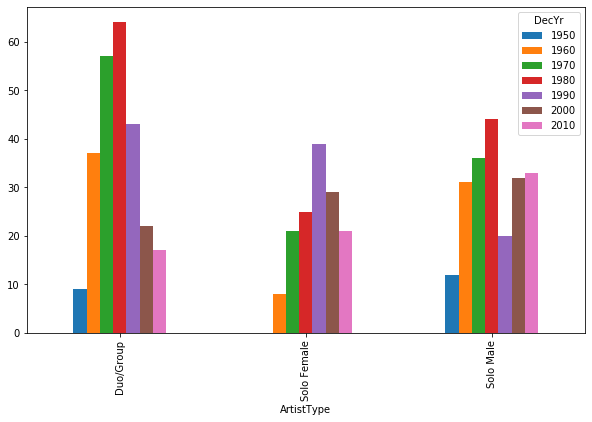

In [113]:
# The following bar chart of the xtab displays the distribution across the decades for each ArtistType.
print("")
print("'bar' plot for ArtistType counts over time: ")
print("xtab_barplots = xtab_DecYrBYArtistType.plot(kind='bar', figsize=(10,6), legend=True)")
xtab_barplots = xtab_DecYrBYArtistType.plot(kind='bar', figsize=(10,6), legend=True)

This bar chart makes it simple to compare the counts both within a given ArtistType and across the ArtistTypes. Again, it's easy to see that the peak in the number of top ranked songs for Duo/Groups was the 1980s, for Solo Females it was the 1990s, and for Solo Males it was the 1980s.  You can also see, that relative to the other ArtistTypes, Duo/Groups have more highly ranked songs from the 1960s thru the 1990s (for each color bar, the Duo/Group bar was highest),  while Solo males have had more highly ranked songs in the last 2 decades.

<a class="anchor" id="Subplots"></a>
<h4>Plots with Subplots</h4>
<a href='#toc'>Return to TOC</a>
    
Just as it's hard to make comparisons across the long lists created by the 'groupby' method, it can also be difficult to make comparisons among the values in a plot of a crosstab that has a large number of rows or columns. Here, it's sometime handy to divide the plot into individual subplots. In this case, to create separate subplots for each ArtistType, we set the 'subplots' parameter to true, indicate the kind of grid 'layout' we want (e.g. 3 subplots across and 3 down), the amount of space the grid (it's 'figure size') should occupy (here it's going to be 10 wide and 8 high), and whether we want a legend. \[Note: The figure size theoretically indicates the total space in inches that the subplots should occupy. Usually, you have to play around with this to get the correct settings). 

Unfortunately, as you'll see below, when we create subplots for the original xtab, unexpected results occur. We get a separate plot for each year, not each ArtistType.


'bar' plot with subplots:

xtab_DecYrBYArtistType.plot(kind='bar', subplots=True, layout=(3,3), figsize=(10,8), legend=False)


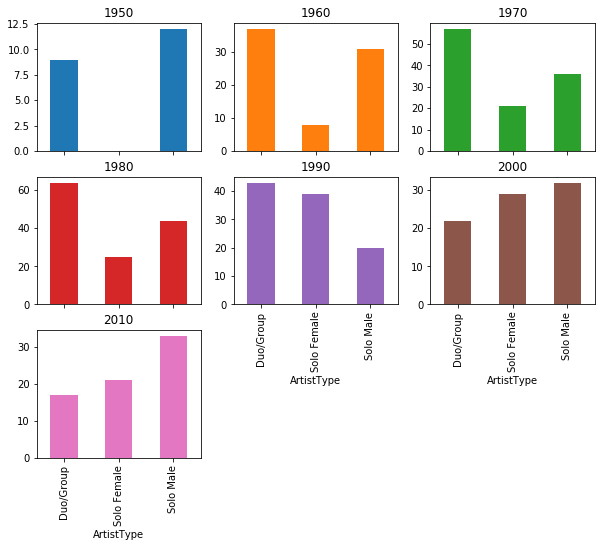

In [114]:

print("")
print("'bar' plot with subplots:")
print("")
print("xtab_DecYrBYArtistType.plot(kind='bar', subplots=True, layout=(3,3), figsize=(10,8), legend=False)")
xtab_bar_subplots = xtab_DecYrBYArtistType.plot(kind='bar', subplots=True, layout=(3,3), figsize=(10,8), legend=False)

In [115]:
# So, to solve this problem we need to reverse the x, y positions of the two variables.
# We do this by rotating or transposing the xtab, so that DecYrs become the rows 
# and ArtistType become the columns.
# In this way we can see the way the counts for each of the ArtistTypes
# changes over the year.

xtab_ArtistTypeByDecYrTrans = xtab_DecYrBYArtistType.transpose()
xtab_ArtistTypeByDecYrTrans

ArtistType,Duo/Group,Solo Female,Solo Male
DecYr,,,
1950,9.0,NaN,12.0
1960,37.0,8.0,31.0
1970,57.0,21.0,36.0
1980,64.0,25.0,44.0
1990,43.0,39.0,20.0
2000,22.0,29.0,32.0
2010,17.0,21.0,33.0



Bar plot with subplots: DecYr by ArtistType:

xtab_subplot1 = xtab_ArtistTypeByDecYr.plot(kind='bar', subplots=True, layout=(1,3), figsize=(10,2), legend=False)


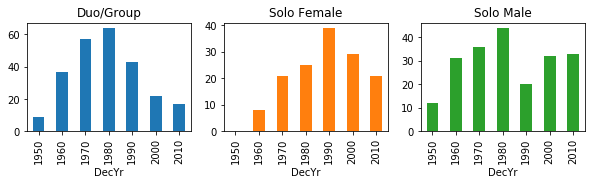

In [116]:
# The setup of the subplot is similar to earlier one, except now the plot layout has 1 row and 3 cols, 
# producing separate plots for each ArtistType. The problem with these plots is that they all have 
# different y (vertical) ranges. So while you see the ups and downs you don't have a sense
# of how they differ in magnitude.

print("")
print("Bar plot with subplots: DecYr by ArtistType:")
print("")
print("xtab_subplot1 = xtab_ArtistTypeByDecYr.plot(kind='bar', subplots=True, layout=(1,3), figsize=(10,2), legend=False)")
xtab_bar_subplot1 = xtab_ArtistTypeByDecYrTrans.plot(kind='bar', subplots=True, layout=(1,3), figsize=(10,2), legend=False)


Bar plot with subplots: ArtistType by DecYr:

xtab_subplot2 = xtab_ArtistTypeByDecYrTrans.plot(kind='bar', subplots=True, layout=(3,1), figsize=(6,6), legend=False)


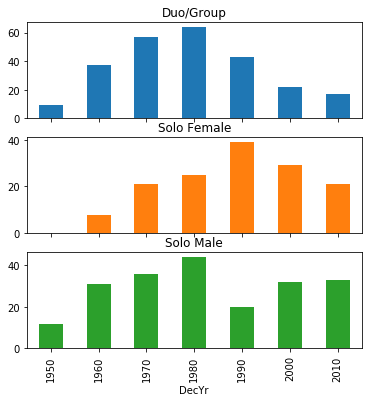

In [117]:
# A slightly different version of the same bar plot comes about when
# we alter the 'layout' to 3 rows and 1 column, adjusting the 'figsize' to accomodate
# the shift in layout.  This layout is probably the easiest for comparing
# shifts across time for each ArtistType. It's easy to see when one ArtistType
# went up and another down. However, it still has the problem with comparing magnitudes.

print("")
print("Bar plot with subplots: ArtistType by DecYr:")
print("")
print("xtab_subplot2 = xtab_ArtistTypeByDecYrTrans.plot(kind='bar', subplots=True, layout=(3,1), figsize=(6,6), legend=False)")

xtab_subplot2 = xtab_ArtistTypeByDecYrTrans.plot(kind='bar', subplots=True, layout=(3,1), figsize=(6,6), legend=False)

<a class="anchor" id="Lines"></a>
<h4>Line Plots</h4>
<a href='#toc'>Return to TOC</a>

Both the patterns and magnitudes are more easily seen by shifting to a 'line' plot. Here, don't need subplots so the magnitudes, as well as the peaks and valleys, are easily determined because the 3 plots for the 3 ArtistTypes use the same X and Y axes.


'line' plot for each DecYr across ArtistTypes:  

xtab_subplots_line = xtab_DecYrBYArtistType.plot(kind='line', subplots=False, figsize=(6,4), legend=True)

Comparing the three lines we see the predominance of Top600 Songs released by Duo/Groups
and Solo Males in the 80s and their subsequent decline in this century with the concommitant
rise in releases from Solo Female artists in the 90s followed by their dropoff and
the re-emergence of Solo/Male artists.


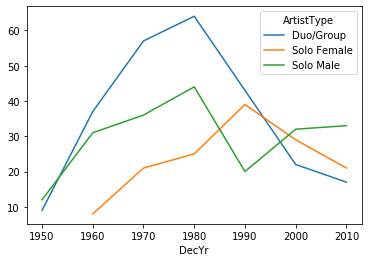

In [118]:
print("")
print("'line' plot for each DecYr across ArtistTypes:  ")
print("")
print("xtab_subplots_line = xtab_DecYrBYArtistType.plot(kind='line', subplots=False, figsize=(6,4), legend=True)")
xtab_line = xtab_ArtistTypeByDecYr.plot(kind='line', subplots=False, figsize=(6,4), legend=True)
print("")
print("Comparing the three lines we see the predominance of Top600 Songs released by Duo/Groups")
print("and Solo Males in the 80s and their subsequent decline in this century with the concommitant")
print("rise in releases from Solo Female artists in the 90s followed by their dropoff and")
print("the re-emergence of Solo/Male artists.")

<a class="anchor" id="Final"></a>
<h3>Final Comments</h3>
<a href='#toc'>Return to TOC</a>

The dataset used throughout these notes is heavy on the categorical side and light on the numerical side. Yet, most of the methods that have been employed could be easily used with numerical data.  For those who are interested, the dataset entitled <a href= "https://github.com/daveking63/Billboard-and-RIAA-datasets/blob/master/RIAA-Top100_Artists_All_Certified_Albums_.txt"><i>RIAA-Top100_Artists_All_Certified_Albums</i></a> has a good mix of numerical and categorical variables. For "fun" you might try a number of the methods described here with that set.

The other final caveat, there are whole segments of pandas methods that are relatively untouched in these notes. For example, 'reshaping' and the 'pivot' can play a key role in working with multi-column arrays (like those towards the end of these notes). The same can be said for pandas' 'time series' and 'date' functionality. All of these are covered in the pandas' documentation. 